<a href="https://colab.research.google.com/github/MoustacheGolem/FSI-P3/blob/main/FSI_T3_190017953.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade de Brasilia Departamento de Ciência da Computação Projeto 2 , Fundamentos de Sistemas Inteligentes, 2022/1

Mateus de Paula Rodrigues - 190017953

***
# **- ÍNDICE -**


*   [Introdução](#scrollTo=TwruuBG81oxo)
*   [Parte 1: K-means.](#scrollTo=fkz_ybf0BlgR)
*   [Parte 2: K-Medoids.](#scrollTo=BtUHeSacQf-D)
*   [Parte 3: Comparação.](#scrollTo=PcgKl0akpAbu)
*   [Referencias.](#scrollTo=h5A4fQ1Yn33N)



***
# Introdução

Nesse projeto temos como objetivo aprofundar nosso entendimento de sistemas inteligentes através da implementação, em Python, e comparação de dois algoritmos K-Means e K-Medoids, ambos focam na clusterização de pontos de data.


**K-means** trabalha separando N pontos de data em K clusters, para isso ele calcula pontos de data fictícios, (centroides), com a menor distancia media entre ele e todos o pontos de data reais.

Já **K-Medoids** trabalha separando os N pontos de data em K clusters calculando a menor media de distancia entre um ponto de data real e todos os seus pontos mais próximos, e trocando de posição com esses pontos se estes possuírem uma media de distancia menor.

Testaremos esses algoritmos utilizando a imagem abaixo:

![imagementrada45.JPG](https://drive.google.com/uc?id=1ZjWesAP0tB92PL5xs8zTmdLg8Jgd_QJ3)

Imagem mostra uma placa de Petri, contendo um fungo amarelo, sobre uma superfície escura. Nosso objetivo sera separar essa imagem em *K=4* clusters, o fundo preto, a borda da placa de Petri, o interior da placa de Petri, e o fungo em si.

***
# Parte 1: K-means.

Este é o mais simples dos dois algoritmos, Possui complexidade  $O(NKT)$ para $N = numero de amostras$, $K = numero de clusters$ e $T = numero de iterações$.

Para esse projeto escolhemos trabalhar com a biblioteca opencv, que foca no tratamento de imagens e inclui a função KMeans(), que executa o algoritmo K-means. 


In [3]:
import cv2 # Biblioteca opencv para tratamento de imagens, usada para executar kmeans

# As bibliotecas que são sempre uteis:
import numpy as np
import matplotlib.pyplot as plt

Primeiro carregaremos a imagem que ira ser utilizada, é possível notar que esta é ligeiramente diferente da imagem original, pois teve sua borda cortada e seu tamanho reduzido, a motivação para isso sera explicado na Parte 2 do projeto.

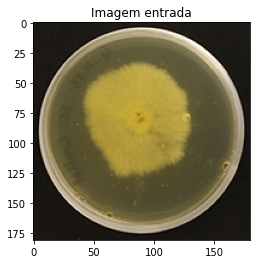

In [4]:
image_entrada = cv2.imread("/content/imagementrada180.JPG") 
image_entrada = cv2.cvtColor(image_entrada, cv2.COLOR_BGR2RGB) 


plt.imshow(image_entrada)
plt.title("Imagem entrada")
plt.show()

Para separar esta imagem da maneira desejada utilizaremos a diferença de suas cores, logo os valores Red, Green e Blue da imagem irão definir a distancias entre os pontos.

Para tanto transformaremos a imagem em um data set no formato que Kmeans() utiliza:

In [5]:
#imread() devolve um vetor 3D(largura,altura,RGB)
imagem_vetor = image_entrada.reshape((-1, 3)) #transforma em vetor 2D(altura * largura, RGB)
imagem_vetor = np.float32(imagem_vetor) #transforma valores em float32 para ocupar menos espaco

print(imagem_vetor.shape)

(32580, 3)


Configuração e execução de **Kmeans()**:

In [42]:
#numero de clusters
K = 4  
#criterio de parada, em maximo numero de iterações (100) ou se os Centroids muderem pouco de posição (menos de 0.2) 
criterio = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# numero de iterações do algoritmo kmeans para evitar, por exemplo, maximais em clusters locais.
T = 10

# centroids iniciais escolhidos aleatoriamente.
centroids_iniciais = cv2.KMEANS_RANDOM_CENTERS

# labels = define a qual cluster cada pixel pertence.
# centers = posições de todos os centroids finais.
_, labels, (centers) = cv2.kmeans(imagem_vetor, K, None, criterio, T, centroids_iniciais)

Com o algoritmo executado faremos um mascaramento na imagem entrada para ser possível ler o resultado:

In [43]:
centers = np.uint8(centers) #retornar centroids do formato que Kmeans() para o formato de imagem RGB, assim temos as cores de cada centroid.
labels = labels.flatten()
imagem_segmentada_means = centers[labels]  # colorir cada cluster com a cor de seu centroid.
imagem_segmentada_means = imagem_segmentada_means.reshape(image_entrada.shape) #gerar imagem no formato original para ser mostrada.


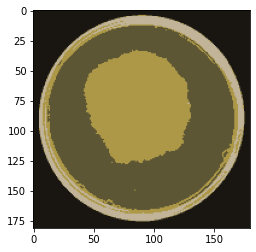

In [44]:
plt.imshow(imagem_segmentada_means)
plt.show()

Acima temos o resultado final, é possível observar que a maior dificuldade que K-means teve foi na diferenciação da borda e do fungo que se encontra colado nesta, observaremos melhor os resultados na parte final.

***
# Parte 2: K-Medoids.

O K-Medoids é um pouco mais complexo, sendo $O(N^{2}KT)$, consideravelmente mais lento que K-Means.

Para execução deste algoritmo escolhemos trabalhar com uma extensão biblioteca scikitlearn, a sklearn-extra.

In [29]:
!pip install scikit-learn-extra #colab n possui essa biblioteca como standart entao temos que instalar.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.1 MB/s 


In [9]:
from sklearn_extra.cluster import KMedoids #importar biblioteca sklearn extra

Faremos uso da mesma *imagem entrada* e da mesmo *vetor* que foram utilizadasna parte 1.

Agora é um bom momento para explicar as modificações na imagem original, que era de tamanho 750 por 500.

O motivação vem das limitações da implementação do algoritmo KMedoids, pois este não é só mais lento, mas também ocupa muito mais espaço, possuindo uma complexidade espacial de $O(N^{2})$ o que significa que a imagem original pede meio terabyte de espaço para processamento, isso se da pois o algoritmo guarda todas as distancias entre todos os pontos para aumentar sua velocidade.

Para lidar com isso cortamos parte da imagem original, parte do fundo preto, e diminuímos seu tamanho até um tramalho funcional, resultando em uma imagem de 180 por 180. 






In [10]:
#dataset
df = np.array(imagem_vetor)

# numero de clusters
K = 4

# chamada da função, metodo pam. 
k_medoids_r = KMedoids(n_clusters=K,init='heuristic',method='pam').fit(df)


Mascararemos seu resultado de manira similar a K-Means:

In [24]:
labels_medoids = k_medoids_r.labels_.flatten()

centers = k_medoids_r.cluster_centers_
centers = np.uint8(centers) 

imagem_segmentada_medoids = centers[labels_medoids]
imagem_segmentada_medoids = imagem_segmentada_medoids.reshape(image_entrada.shape)

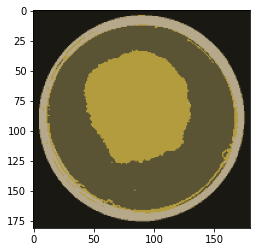

In [25]:
plt.imshow(imagem_segmentada_medoids)
plt.show()

Agora temos o resultado final da K-Medoids tambem, superficialmente os resultados parecem bem similares, vamos comparalos.

***
## Parte 3: Comparação.

Vamos observas os dois resultados lado a lado:



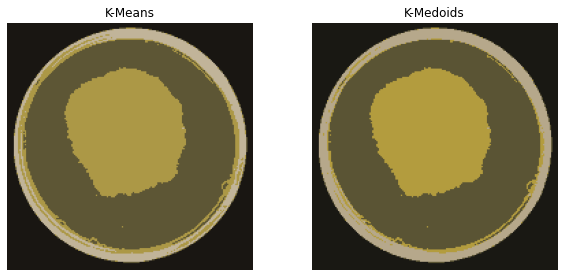

In [45]:
# figura para multiplas imagem
fig = plt.figure(figsize=(10, 10))
rows = 2
columns = 2

# primeira imagem
fig.add_subplot(rows, columns, 1)

plt.imshow(imagem_segmentada_means)
plt.axis('off')
plt.title("K-Means")
  
# segunda imagem
fig.add_subplot(rows, columns, 2)
  
plt.imshow(imagem_segmentada_medoids)
plt.axis('off')
plt.title("K-Medoids")

plt.show()

Ainda é difícil observar as diferenças, então mascararemos a imagem e deixaremos apenas o fungo visivel:

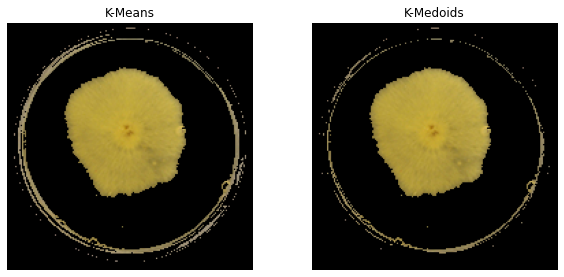

In [35]:
#
mascara_fungo_means = np.copy(image_entrada)
mascara_fungo_means = mascara_fungo_means.reshape((-1, 3))

# cada umna dessas linhas mascara um elemento, mascararamos todos menos o fungo
mascara_fungo_means[labels == 1] = [0, 0, 0] 
#mascara_fungo_means[labels == 2] = [0, 0, 0] 
mascara_fungo_means[labels == 3] = [0, 0, 0] 
mascara_fungo_means[labels == 0] = [0, 0, 0]  

mascara_fungo_means = mascara_fungo_means.reshape(image_entrada.shape)

mascara_fungo_medoids = np.copy(image_entrada)
mascara_fungo_medoids = mascara_fungo_medoids.reshape((-1, 3))

# cada umna dessas linhas mascara um elemento, mascararamos todos menos o fungo
mascara_fungo_medoids[labels_medoids == 1] = [0, 0, 0] 
mascara_fungo_medoids[labels_medoids == 2] = [0, 0, 0] 
mascara_fungo_medoids[labels_medoids == 3] = [0, 0, 0] 
#mascara_fungo_medoids[labels_medoids == 0] = [0, 0, 0]  

mascara_fungo_medoids = mascara_fungo_medoids.reshape(image_entrada.shape)



# figura para multiplas imagem
fig = plt.figure(figsize=(10, 10))
rows = 2
columns = 2

# primeira imagem
fig.add_subplot(rows, columns, 1)

plt.imshow(mascara_fungo_means)
plt.axis('off')
plt.title("K-Means")
  
# segunda imagem
fig.add_subplot(rows, columns, 2)
  
plt.imshow(mascara_fungo_medoids)
plt.axis('off')
plt.title("K-Medoids")

plt.show()

Com as imagens lado a lado fica fácil observar as diferenças existentes entre cada algoritmo, ambos foram capazes de capturar a massa central do fungo bem e de maneira similar, mas tiveram dificuldade em capturar exatamente a separação entre a borda da placa de Petri e o fungo existente perto da borda.

Importante observar que realmente existe fungo colado na parede interior da borda mas não existe fungo na parte exterior, aqui podemos notar que apesar de ambos terem dificuldade nessa parte, K-Medoids foi capas de melhor capturar as posições reais do fungo colado na parede interna, e também cometeu menos erros capturando fungo inexistente na parte exterior da placa.

Assim fica claro que K-Medoids possui acurácia melhor nesse exemplo em particular, mas também devemos lembrar que K-Medoids é muito pior no quesito de eficiência, pois não só é mais lento como também ocupa muito mais espaço.

Implementando algo como *Principal Component Analysis*, para reduzir as *features* do nosso dataset, de altura e largura para apenas uma dimensão, seria possível usar a imagem original em ambos os algorítimos, mas isso também modificaria os resultados finais de sua própria maneira, então escolhemos reduzir o tamanho da imagem, o que modifica o dataset de maneira mais clara facilitando a observação.

***
# Referencias



1.   https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python
2.   https://towardsdatascience.com/k-medoid-clustering-pam-algorithm-in-python-with-solved-example-c0dcb35b3f46
3.   https://scikit-learn-extra.readthedocs.io/en/stable/modules/cluster.html#k-medoids
4.   https://aprender3.unb.br/pluginfile.php/2262080/mod_resource/content/1/park2009.pdf

